# <left>Кузьмин Д. Ю. М80-304Б</left>

#   <center>Лабораторная работа №1</center>

##   <center>Второй датасет</center>

### Выбираем датасет

Датасет взят с сайта *Kaggle*: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

### Описание данных

**Цель:** Проанализировать и подготовит данные из датасета для решения задачи предсказания рейтинга приложения.

**Содержание:** Данные содержат открытую информацию о приложениях из *AppStore* в виде первого приложения, а также описание этих приложений в виде второго датасета.

### Импортируем необходимые библиотеки

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pymorphy2

import nltk
from nltk.corpus import stopwords


from sklearn.preprocessing import StandardScaler 

import warnings

from tqdm import tqdm

from pandas.plotting import scatter_matrix


warnings.filterwarnings("ignore")

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,8)

### Импортируем данные

Импортируем два датасета.

In [2]:
HOUSING_PATH = "data/" 
def load_apple_data(housing_path=HOUSING_PATH):    
    csv_path1 = os.path.join(housing_path, "AppleStore.csv")
    csv_path2 = os.path.join(housing_path, "appleStore_description.csv")   
    return pd.read_csv(csv_path1), pd.read_csv(csv_path2)

In [3]:
apple_df, description_df = load_apple_data()

print("Размер датасета данных магазина:", apple_df.shape)

apple_df.head(3)

Размер датасета данных магазина: (7197, 17)


Unnamed: 0         id                                       track_name  \
0           1  281656475                                  PAC-MAN Premium   
1           2  281796108                        Evernote - stay organized   
2           3  281940292  WeatherBug - Local Weather, Radar, Maps, Alerts   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   

   user_rating  user_rating_ver    ver cont_rating   prime_genre  \
0          4.0              4.5  6.3.5          4+         Games   
1          4.0              3.5  8.2.2          4+  Productivity   
2          3.5              4.5  5.0.0          4+       Weather   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1

In [4]:
print("Размер датасета описаний приложений:", description_df.shape)

description_df.head(7)

Размер датасета описаний приложений: (7197, 4)


id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   
5  283619399                                   Shanghai Mahjong    10485713   
6  283646709             PayPal - Send and request money safely   227795968   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...  
5  ★ WINNER "BEST GAME" 2009\n★ 3rd PLACE WINNER ...  
6  Description\nTAP INTO YOUR MONEY\nSend money o...

### Посмотрим на содержание датасета

Получим полный список колонок  в датасетах c информацией:

In [5]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [6]:
description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7197 non-null   int64 
 1   track_name  7197 non-null   object
 2   size_bytes  7197 non-null   int64 
 3   app_desc    7197 non-null   object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


Из описания можем увидеть, что имеются нечисловые колонки, с которыми придется работать.

Стоит отметить, что в данных нет пропусков, что упрощает работу.

In [7]:
apple_df.describe(include="all")

Unnamed: 0            id           track_name    size_bytes  \
count    7197.000000  7.197000e+03                 7197  7.197000e+03   
unique           NaN           NaN                 7195           NaN   
top              NaN           NaN  Mannequin Challenge           NaN   
freq             NaN           NaN                    2           NaN   
mean     4759.069612  8.631310e+08                  NaN  1.991345e+08   
std      3093.625213  2.712368e+08                  NaN  3.592069e+08   
min         1.000000  2.816565e+08                  NaN  5.898240e+05   
25%      2090.000000  6.000937e+08                  NaN  4.692275e+07   
50%      4380.000000  9.781482e+08                  NaN  9.715302e+07   
75%      7223.000000  1.082310e+09                  NaN  1.819249e+08   
max     11097.000000  1.188376e+09                  NaN  4.025970e+09   

       currency        price  rating_count_tot  rating_count_ver  user_rating  \
count      7197  7197.000000      7.197000e+03       7197.000000  7197.000000   
unique        1          NaN               NaN               NaN          NaN   
top         USD          NaN               NaN               NaN          NaN   
freq       7197          NaN               NaN               NaN          NaN   
mean        NaN     1.726218      1.289291e+04        460.373906     3.526956   
std         NaN     5.833006      7.573941e+04       3920.455183     1.517948   
min         NaN     0.000000      0.000000e+00          0.000000     0.000000   
25%         NaN     0.000000      2.800000e+01          1.000000     3.500000   
50%         NaN     0.000000      3.000000e+02         23.000000     4.000000   
75%         NaN     1.990000      2.793000e+03        140.000000     4.500000   
max         NaN   299.990000      2.974676e+06     177050.000000     5.000000   

        user_rating_ver   ver cont_rating prime_genre  sup_devices.num  \
count       7197.000000  7197        7197        7197      7197.000000   
unique              NaN  1590           4          23              NaN   
top                 NaN   1.0          4+       Games              NaN   
freq                NaN   317        4433        3862              NaN   
mean           3.253578   NaN         NaN         NaN        37.361817   
std            1.809363   NaN         NaN         NaN         3.737715   
min            0.000000   NaN         NaN         NaN         9.000000   
25%            2.500000   NaN         NaN         NaN        37.000000   
50%            4.000000   NaN         NaN         NaN        37.000000   
75%            4.500000   NaN         NaN         NaN        38.000000   
max            5.000000   NaN         NaN         NaN        47.000000   

        ipadSc_urls.num     lang.num      vpp_lic  
count       7197.000000  7197.000000  7197.000000  
unique              NaN          NaN          NaN  
top                 NaN          NaN          NaN  
freq                NaN          NaN          NaN  
mean           3.707100     5.434903     0.993053  
std            1.986005     7.919593     0.083066  
min            0.000000     0.000000     0.000000  
25%            3.000000     1.000000     1.000000  
50%            5.000000     1.000000     1.000000  
75%            5.000000     8.000000     1.000000  
max            5.000000    75.000000     1.000000

### Удалим бесполезные данные

Колонка **currency** имеет одно значение для всех наблюдений, поэтому не несет никакой полезной информации.

Столбец **Unnamed: 0** просто дублирует номер записи в таблице, поэтому он также неинформативен.

In [8]:
apple_df.drop(['currency', 'Unnamed: 0'], axis = 1, inplace = True)

### Объединим датасеты

Мы можем объединить 2 датасета по колонке **id** для упрощенной работы с данными.

In [9]:
apple_df = apple_df.merge(description_df, copy = False)
description_df = None

К датасету добавилась одна колонка с описанием, поскольку остальные колонки второго датасета дублировали информацию из первого.

In [10]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
 15  app_desc          7197 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory 

После объединения сетов можно избавится от неинформативной колонки **id**.

In [11]:
apple_df.drop('id', axis = 1, inplace = True)

### Разберемся с нечисловыми колонками

Нечисловые колонки выделим в отдельный датасет, чтобы потом объединить обработанные столбцы нечисловые с обработанными числовыми. 

In [12]:
non_num_cols = ['ver', 'cont_rating', 'prime_genre', 'app_desc', 'track_name']
first_df = apple_df[non_num_cols]
second_df = apple_df.drop(non_num_cols, axis = 1)

#### Колонка ver

Колонка **ver** хранит версии приложений, записанные в большинстве случаев в формате: *v1.v2.v3*. Создадим взамен 3 новых колонки **v1**, **v2**, **v3**.

Однако не все наблюдения соответствуют стандартной записи версии приложения, поэтому обнаружим и преобразуем такие данные вручную с помощью простейших преобразований.

Данные без разделяющей точки оказались числовыми.

In [13]:
first_df[~apple_df['ver'].str.contains('.', regex = False)].ver.unique()

array(['114', '5', '22', '337', '10', '111', '2', '2023', '1', '3348',
       '54', '150', '2000', '15', '708', '18', '104', '3', '4', '11',
       '12', '6'], dtype=object)

Данные с разделяющей точкой, но с которыми также не все в порядке:

In [14]:
v_seria = first_df.ver.str.split(pat = '.')

In [15]:
v_seria[~v_seria.str[0].str.isdigit()]

224     [iOV 2, 1, 3]
1133      [v2, 13, 9]
3092       [v3, 6, 9]
3224      [v2, 2, 21]
3581         [1,2, 4]
3668       [V3, 7, 0]
4121        [v1, 865]
4176    [Update 1, 1]
Name: ver, dtype: object

In [16]:
v_seria[v_seria.str[1].notna()][~v_seria[v_seria.str[1].notna()].str[1].str.isdigit()]

2849    [1, 025b]
Name: ver, dtype: object

In [17]:
v_seria[v_seria.str[2].notna()][~v_seria[v_seria.str[2].notna()].str[2].str.isdigit()]

6511    [1, 2, 3 Build 19]
6777              [1, 3, ]
Name: ver, dtype: object

Создадим 3 новых колонки.

In [18]:
first_df['v1'] = v_seria.str[0]
first_df['v2'] = v_seria.str[1]
first_df['v3'] = v_seria.str[2]

И преобразуем значения в них.

In [19]:
first_df.loc[[224, 1133, 3224], 'v1'] = 2
first_df.loc[[3581, 4121, 4176], 'v1'] = 1
first_df.loc[[3092, 3668], 'v1'] = 3

first_df.loc[[2849], 'v2'] = 25
first_df.loc[[2849], 'v3'] = 2

first_df.loc[[6511], 'v3'] = 3
first_df.loc[[6777], 'v3'] = 0

Для значений типа *v1* и *v1.v2* заполним нулями остальные столбцы.

In [20]:
first_df.loc[first_df['v2'].isna(), 'v2'] = 0
first_df.loc[first_df['v3'].isna(), 'v3'] = 0

Преобразуем эти столбцы к числовому типу.

In [21]:
first_df['v1'] = first_df['v1'].astype('int32')
first_df['v2'] = first_df['v2'].astype('int32')
first_df['v3'] = first_df['v3'].astype('int32')

In [22]:
first_df[['v1', 'v2', 'v3']].describe(include = 'all')

v1             v2            v3
count  7197.000000    7197.000000  7.197000e+03
mean     16.580520     130.792830  3.168028e+05
std     342.731897    8577.612116  2.396124e+07
min       0.000000       0.000000  0.000000e+00
25%       1.000000       0.000000  0.000000e+00
50%       1.000000       2.000000  0.000000e+00
75%       3.000000       5.000000  3.000000e+00
max    9999.000000  718291.000000  2.016092e+09

Непонятно как интерпретироать данные с болльшим значением версии, поэтому выберем стратегию зануления таких версий, чтобы их большие значения не вляияли на алгоритм обучения. 

Возможно, в будущем мне следует лучше разобраться с природой и смыслом таких больших значений, ведь некоторые из них - точно такая же запись номера версии, но без разделяющей точки, а некоторые из них несут информацию о дате релиза.

In [23]:
first_df.loc[first_df['v1'] >= 100, 'v1'] = 0
first_df.loc[first_df['v2'] >= 100, 'v2'] = 0
first_df.loc[first_df['v3'] >= 100, 'v3'] = 0

Наконец, оптимизируем эти столбцы по занимаемой памяти и удалим исходный столбец из датасета.

In [24]:
first_df['v1'] = first_df['v1'].astype('int8')
first_df['v2'] = first_df['v2'].astype('int8')
first_df['v3'] = first_df['v3'].astype('int8')

first_df.drop('ver', axis = 1, inplace = True)

In [25]:
first_df.head()

cont_rating   prime_genre  \
0          4+         Games   
1          4+  Productivity   
2          4+       Weather   
3         12+      Shopping   
4          4+     Reference   

                                            app_desc  \
0  SAVE 20%, now only $3.99 for a limited time!\n...   
1  Let Evernote change the way you organize your ...   
2  Download the most popular free weather app pow...   
3  The eBay app is the best way to find anything ...   
4  On more than 250 million devices around the wo...   

                                          track_name  v1  v2  v3  
0                                    PAC-MAN Premium   6   3   5  
1                          Evernote - stay organized   8   2   2  
2    WeatherBug - Local Weather, Radar, Maps, Alerts   5   0   0  
3  eBay: Best App to Buy, Sell, Save! Online Shop...   5  10   0  
4                                              Bible   7   5   1

#### Остальные нечисловые колонки

Колонки **prime_genre** и **cont_rating** являются категориальными и имеют отонсительно небольшое количество уникальных значений. Поэтому самым оптимальным вариантом для них будет *OneHotEncoding*.

In [26]:
print("Уникальных значений для prime_genre:", first_df.prime_genre.unique().shape[0])
print("Уникальных значений для cont_rating:", first_df.cont_rating.unique().shape[0])

Уникальных значений для prime_genre: 23
Уникальных значений для cont_rating: 4


In [27]:
first_df = pd.concat([first_df, pd.get_dummies(first_df.prime_genre, prefix='gen')], axis=1)
first_df.drop("prime_genre", axis = 1, inplace=True)

In [28]:
first_df = pd.concat([first_df, pd.get_dummies(first_df.cont_rating, prefix='rate')], axis=1)
first_df.drop("cont_rating", axis = 1, inplace=True)

Самой сложной частью преобразования является работа с текстовыми колонками, такими как **app_desc** и **track_name**, информация в которых непосредственно влияет на выбор пользователя.

Возможные варианты: 
- выделить $k$ самых часто встречающихся слов и выделить бинарные колонки для этих слов с целью определения их наличия в тексте
- Посчитать вектор для каждого текста и включить его координаты в качестве отдельной фичи. Лучшим решением будет *tf-idf* вектора в силу того, то они содержат статистическую информацию о важности слова в тексте. Этот метод может быть слишком затратным, если в датасете много различных слов, поэтому необходимо как-то ограничить размерность этих векторов.

Поэтому первым делом посчитаем количество слов в описании с учетом того, что одинаковые слова могут стоять в разных формах и их необходимо нормализовать. Для работы с такими словами я буду использовать библиотеку *pymorphy2*, а также код, который использовал однажды для решения подобных задач.

In [29]:
def split_words_v3(a_text):
    cur_word = ''
    prev_is_alpha = False

    for letter in a_text:
        if  (letter.isalpha() and prev_is_alpha or 
            letter.isdigit() and not prev_is_alpha):
            cur_word += letter
        elif (letter.isalpha() and not prev_is_alpha or
             letter.isdigit() and prev_is_alpha):
            if cur_word: yield cur_word
            cur_word = letter
            prev_is_alpha = not prev_is_alpha
        else:
            if cur_word: yield cur_word
            cur_word = ''
            prev_is_alpha = False
    if cur_word: yield cur_word

In [30]:
class Normalizer:
    def __init__(self):
        self.morth_cache = {}
        self.morth_analyzer = pymorphy2.MorphAnalyzer()

    def get_norm_word_v3(self, a_word):
        if a_word not in self.morth_cache:
            self.morth_cache[a_word] = self.morth_analyzer.parse(a_word)[0].normal_form
        return self.morth_cache[a_word]

In [31]:
def get_doc_words(a_doc, a_split, normalizer):
    for word in a_split(a_doc):
        new_word = normalizer.get_norm_word_v3(word)
        if new_word not in stopwords.words("english") and not new_word.isdigit():
            yield normalizer.get_norm_word_v3(word)

Процесс будет долгим, но терпение будет вознаграждено!

In [32]:
n = 25

norml = Normalizer()

indexes = first_df['app_desc'].index

word2id = {}
counter = {}
good_desc = {}

for idx in tqdm(indexes):
    good_desc[idx] = list(get_doc_words(first_df['app_desc'][idx], split_words_v3, norml))
    for word in good_desc[idx]:
        if word not in counter: 
            counter[word] = 0
        else:
            counter[word] += 1
            if counter[word] > n:
                word2id[word] = len(word2id)
    
print("Количество различных слов в описаниях:", len(counter))
print("Размер tf-idf векторов будет:", len(word2id))

100%|██████████| 7197/7197 [12:36<00:00,  9.52it/s]

Количество различных слов в описаниях: 93709
Размер tf-idf векторов будет: 4998


Несмотря на достаточно высокий порог вхождения, размерность векторов получится слишком большой для того, чтобы хранить вектора для каждой строки датасета. Поэтому остановимя на первом варианте и выделим в датасете $k$ новых бинарных столбцов для наиболее встречающихся слов. 

Я думаю, что стоит проделать эту процедуру для описания и для названия приложения отдельно, поскольку они по разному влияют на пользователя и иметь разную информационнцю ценность.

In [33]:
k = 40
new_cols = sorted(list(counter.items()), key=lambda i: i[1], reverse=True)[:k]

new_cols = list(map(lambda u: u[0], new_cols))

for word in new_cols:
    first_df[word + '_col'] = 0

In [34]:
for idx in tqdm(indexes):
    for word in good_desc[idx]:
        if word in new_cols:
            first_df.loc[idx, word + '_col'] = 1

100%|██████████| 7197/7197 [03:38<00:00, 33.00it/s]


In [35]:
first_df.drop('app_desc', axis = 1, inplace = True)

Повторим процедуру для названий приложений:

In [36]:
indexes = first_df['track_name'].index

counter = {}
good_desc = {}

for idx in tqdm(indexes):
    good_desc[idx] = list(get_doc_words(first_df['track_name'][idx], split_words_v3, norml))
    for word in good_desc[idx]:
        if word not in counter: 
            counter[word] = 0
        else:
            counter[word] += 1
    
print("Количество различных слов в названиях:", len(counter))

100%|██████████| 7197/7197 [00:16<00:00, 443.43it/s]

Количество различных слов в названиях: 8840


In [37]:
k = 40
new_cols = sorted(list(counter.items()), key=lambda i: i[1], reverse=True)[:k]

new_cols = list(map(lambda u: u[0], new_cols))

for word in new_cols:
    first_df[word + '_name'] = 0

In [38]:
for idx in tqdm(indexes):
    for word in good_desc[idx]:
        if word in new_cols:
            first_df.loc[idx, word + '_name'] = 1

100%|██████████| 7197/7197 [00:05<00:00, 1287.13it/s]


In [39]:
first_df.drop('track_name', axis = 1, inplace = True)

In [40]:
new_cols = None
good_desc = None
counter = None

Теперь мы преобразовали всех наши нечисловые данные в числовой вид.

In [41]:
first_df.describe()

v1           v2           v3     gen_Book  gen_Business  \
count  7197.000000  7197.000000  7197.000000  7197.000000   7197.000000   
mean      2.294706     5.118938     2.581909     0.015562      0.007920   
std       3.022841    10.820367     7.380387     0.123782      0.088647   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       1.000000     0.000000     0.000000     0.000000      0.000000   
50%       1.000000     2.000000     0.000000     0.000000      0.000000   
75%       3.000000     5.000000     3.000000     0.000000      0.000000   
max      95.000000    99.000000    99.000000     1.000000      1.000000   

       gen_Catalogs  gen_Education  gen_Entertainment  gen_Finance  \
count   7197.000000    7197.000000        7197.000000  7197.000000   
mean       0.001389       0.062943           0.074337     0.014450   
std        0.037252       0.242877           0.262336     0.119347   
min        0.000000       0.000000           0.000000     0.000000   
25%        0.000000       0.000000           0.000000     0.000000   
50%        0.000000       0.000000           0.000000     0.000000   
75%        0.000000       0.000000           0.000000     0.000000   
max        1.000000       1.000000           1.000000     1.000000   

       gen_Food & Drink  ...    real_name   maker_name    city_name  \
count       7197.000000  ...  7197.000000  7197.000000  7197.000000   
mean           0.008754  ...     0.007503     0.007364     0.007086   
std            0.093157  ...     0.086301     0.085504     0.083887   
min            0.000000  ...     0.000000     0.000000     0.000000   
25%            0.000000  ...     0.000000     0.000000     0.000000   
50%            0.000000  ...     0.000000     0.000000     0.000000   
75%            0.000000  ...     0.000000     0.000000     0.000000   
max            1.000000  ...     1.000000     1.000000     1.000000   

          run_name      vr_name     car_name  escape_name  sports_name  \
count  7197.000000  7197.000000  7197.000000  7197.000000  7197.000000   
mean      0.007086     0.007086     0.006947     0.006253     0.006253   
std       0.083887     0.083887     0.083066     0.078831     0.078831   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        super_name   emoji_name  
count  7197.000000  7197.000000  
mean      0.006392     0.006114  
std       0.079697     0.077956  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 110 columns]

### Посмотрим на зависимости между данными

Обратим внимание на то, как зависит средний рейтинг приложения от жанра игры.

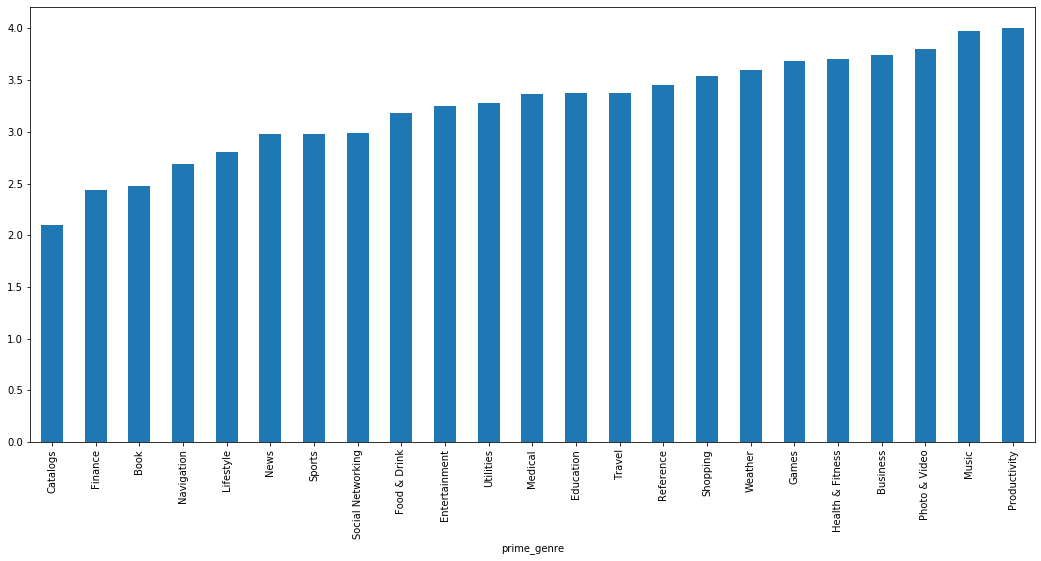

In [42]:
apple_df[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values().plot.bar()

Также интересно обратить внимание на кореляции между числовыми данными.

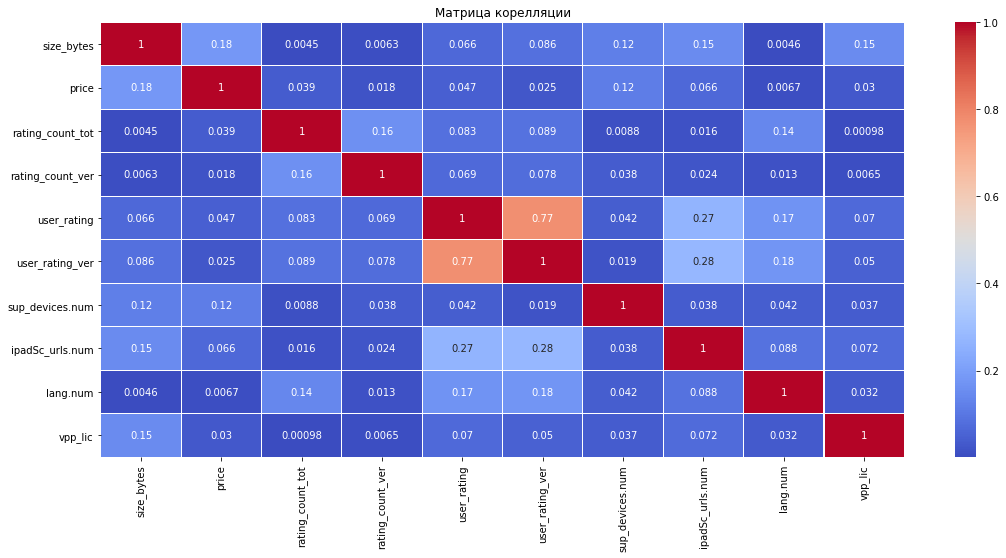

In [43]:
fi = plt.figure()
ax1 = fi.add_subplot()
ax1.set_title('Матрица корелляции')
sns.heatmap(second_df.corr().abs(), annot=True, cmap = "coolwarm", linewidth = 0.1, ax = ax1)

Посмотрим на распределение цены по рейтингу. 

Сразу обнаружим, что есть выбросные значения цены.

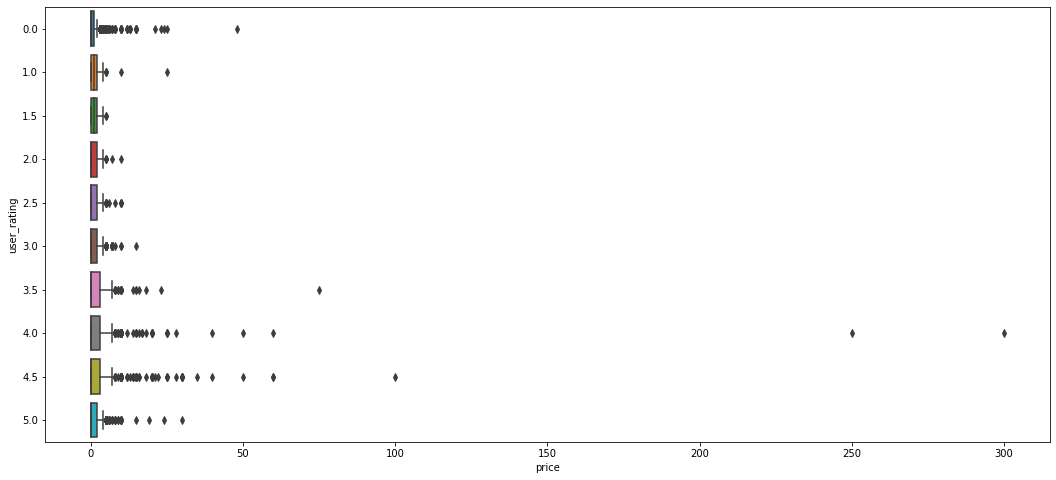

In [44]:
sns.boxplot(y="user_rating", x="price", data=apple_df, orient="h")

Зависимость среднего рейтинга от количеста поддерживаемых языков.

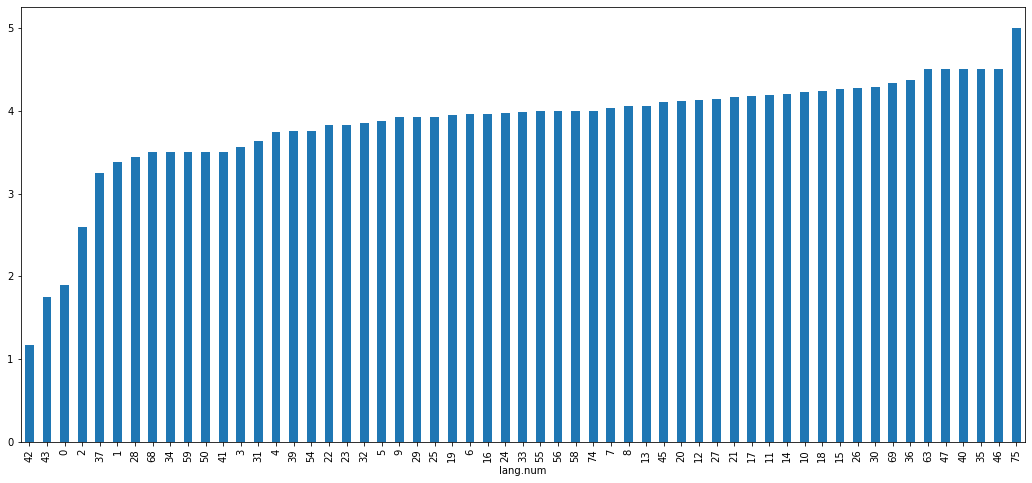

In [45]:
apple_df[['lang.num', 'user_rating']].groupby('lang.num').mean()['user_rating'].sort_values().plot.bar()

### Слияние разделенных датасетов

После того как датасеты были обработаны, их можно слить обратно вместе для дальнейшей работы.

In [46]:
apple_df = pd.concat([first_df, second_df], axis=1, sort=False)

### Избавимся от выбросов

Выбросные значения цены могут негативно повлиять на предсказывающий алгоритм, поэтому заменим их на среднее среди платных приложений.

In [47]:
rub_val = 100
apple_df.loc[apple_df['price'] > rub_val, 'price'] = apple_df[apple_df['price'] > 0].price.mean()

### Сгенерируем новые фичи


Очень важной чертой приложения для меня лично - это его бесплатность, поэтому добавить такую фичу в наш датасет - самое очевидное, что приходит на ум.

In [48]:
apple_df["not_free"] = 0
apple_df.loc[apple_df.price > 0.0, "not_free"] = 1

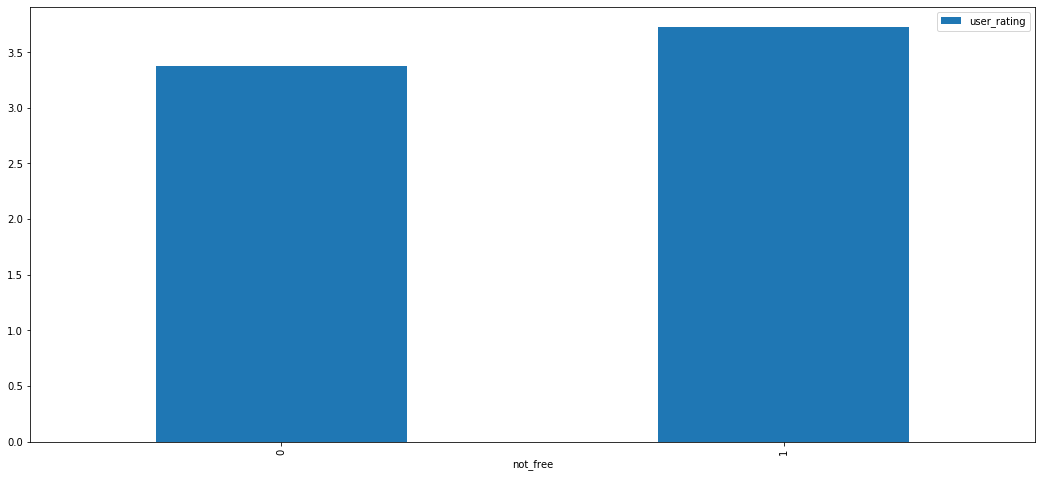

In [49]:
apple_df.groupby(['not_free'])[['user_rating']].mean().plot.bar()

Также можно заметить, что приложения, которые поддерживают мало языков, получаю небольшой рейтинг, поэтому выделим в отдельную фичу наличие более $l$ поддерживаемых языков.


In [50]:
l = 3
apple_df["more_langs"] = 0
apple_df.loc[apple_df['lang.num'] > l, "more_langs"] = 1

### Подготовка тренировочного и тестового набора

Разделим полученный датасет с обработанными данными на тренировочный и обучающий.

Поделим датасет в примерном соотношении: 80% для тренировки и 20% для теста.

В данном случае нет четко выраженного критерия разбития, поэтому делить будем случайным образом с помощью функции с лекции.

In [51]:
def split_train_test(data, test_ratio, state = 42):    
    shuffled_indices = np.random.RandomState(seed=state).permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 

In [52]:
X_train, X_test = split_train_test(apple_df, 0.2)
print("Размер тренировочного датасета:", len(X_train))
print("Размер тестового датасета:", len(X_test))
print("Количество данных для тестового набора составляет:", str(100 * X_test.shape[0] / apple_df.shape[0]) + "%")

Размер тренировочного датасета: 5758
Размер тестового датасета: 1439
Количество данных для тестового набора составляет: 19.994442128664723%


In [53]:
Y_train = X_train['user_rating']
Y_test = X_test['user_rating']

X_train.drop('user_rating', axis = 1, inplace = True)
X_test.drop('user_rating', axis = 1, inplace = True)

### Нормализация

Качество работы множества алгоритмов зависит от нормированности данных, поэтому нормализуем наш тренировочный и тестовый датасет.

Нормализацию проведём на стандартное отклонение:

In [54]:
scale_features_std = StandardScaler() 

X_train = scale_features_std.fit_transform(X_train) 
X_test = scale_features_std.transform(X_test) 